In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
option_300ETF=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第11章/300ETF购12月3500合约每日价格数据.xlsx',
                           sheet_name="Sheet1",header=0,index_col=0)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '2020-11-26'),
  Text(0.0, 0, '2020-04-23'),
  Text(20.0, 0, '2020-05-26'),
  Text(40.0, 0, '2020-06-23'),
  Text(60.0, 0, '2020-07-23'),
  Text(80.0, 0, '2020-08-21'),
  Text(100.0, 0, '2020-09-21'),
  Text(120.0, 0, '2020-10-28'),
  Text(140.0, 0, '2020-11-25'),
  Text(160.0, 0, '2020-12-23'),
  Text(180.0, 0, '')])

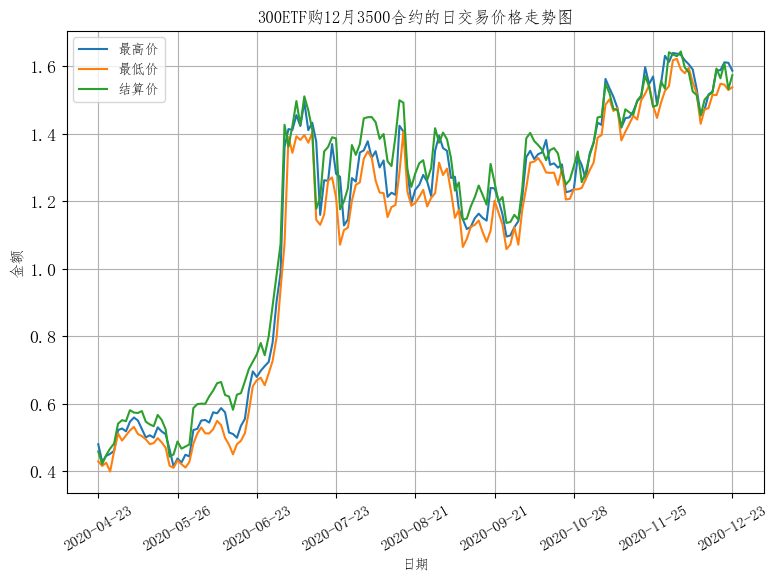

In [6]:
option_300ETF.plot(figsize=(9,6),title=u'300ETF购12月3500合约的日交易价格走势图',grid=True,fontsize=13)
plt.ylabel(u'金额',fontsize=11)
plt.xticks(fontsize=11,rotation=30)

In [7]:
option_HS300=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第11章/沪深300股指沽12月4000合约每日价格数据.xlsx',
                           sheet_name="Sheet1",header=0,index_col=0)

Text(0, 0.5, '金额')

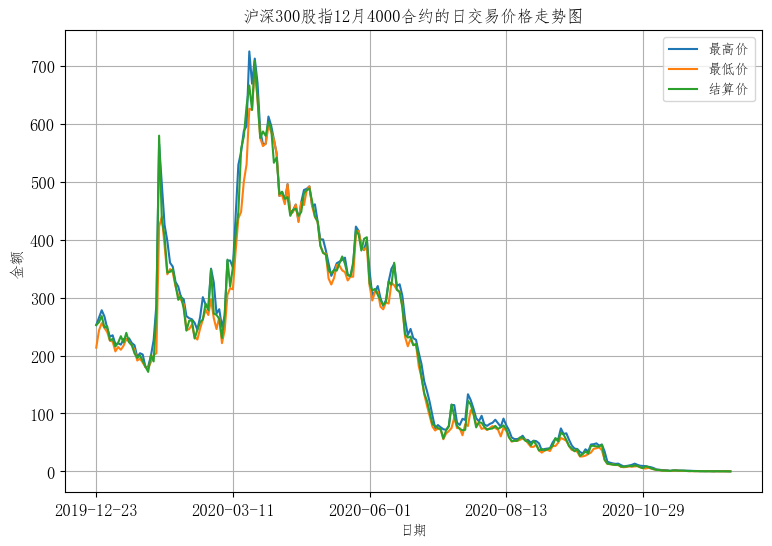

In [8]:
option_HS300.plot(figsize=(9,6),title=u'沪深300股指12月4000合约的日交易价格走势图',grid=True,fontsize=12)
plt.ylabel(u'金额',fontsize=11)

In [9]:
S=np.linspace(4,7,200) #期权到期时工商银行A股股价的等差数列
K_call=5.3
C=0.1 #看涨期权的期权费
N=10000 #一份看涨期权对应基础资产工商银行A股的数量

In [10]:
profit1_call=N*np.maximum(S-K_call,0)
profit2_call=N*np.maximum(S-K_call-C,-C)

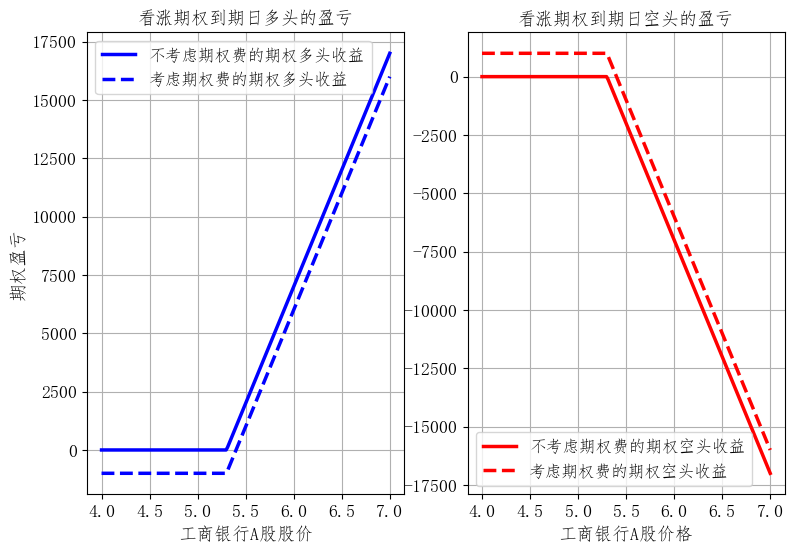

In [11]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(S,profit1_call,'b-',label=u'不考虑期权费的期权多头收益',lw=2.5)
plt.plot(S,profit2_call,'b--',label=u'考虑期权费的期权多头收益',lw=2.5)
plt.xlabel(u'工商银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权盈亏',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'看涨期权到期日多头的盈亏',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(1,2,2)
plt.plot(S,-profit1_call,'r-',label=u'不考虑期权费的期权空头收益',lw=2.5)
plt.plot(S,-profit2_call,'r--',label=u'考虑期权费的期权空头收益',lw=2.5)
plt.xlabel(u'工商银行A股价格',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'看涨期权到期日空头的盈亏',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [12]:
K_put=5.1 #看跌期权的行权价格
P=0.2 #看跌期权的期权费

In [13]:
profit1_put=N*np.maximum(K_put-S,0)
profit2_put=N*np.maximum(K_put-S-P,-P)

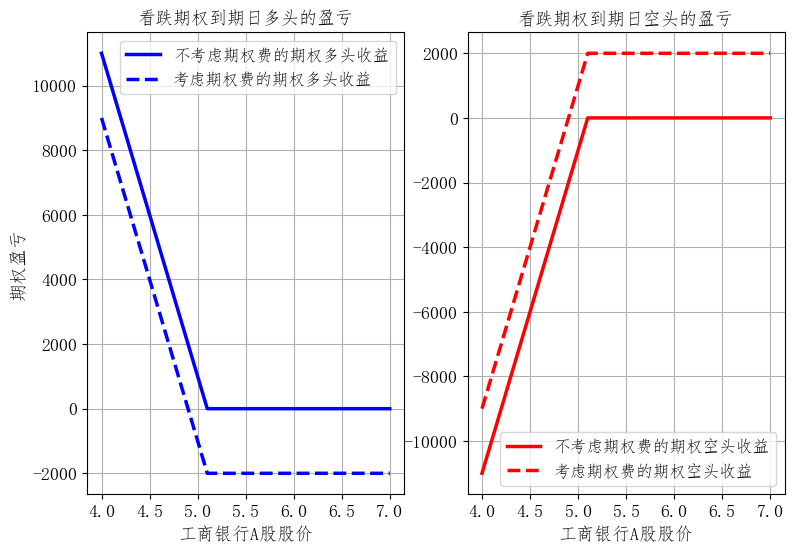

In [14]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(S,profit1_put,'b-',label=u'不考虑期权费的期权多头收益',lw=2.5)
plt.plot(S,profit2_put,'b--',label=u'考虑期权费的期权多头收益',lw=2.5)
plt.xlabel(u'工商银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权盈亏',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'看跌期权到期日多头的盈亏',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(1,2,2)
plt.plot(S,-profit1_put,'r-',label=u'不考虑期权费的期权空头收益',lw=2.5)
plt.plot(S,-profit2_put,'r--',label=u'考虑期权费的期权空头收益',lw=2.5)
plt.xlabel(u'工商银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'看跌期权到期日空头的盈亏',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [15]:
def option_parity(opt,c,p,S,K,r,T):
    '''定义一个通过看跌-看涨平价关系式计算欧式看涨、看跌期权价格的函数
    opt:代表需要计算的欧式期权类型，输入opt='call'表示计算看涨期权价格，输入其他则表示计算看跌期权价格
    c:代表看涨期权价格，如果计算看涨期权价格，则输入c='Na'
    p:代表看跌期权价格，如果计算看跌期权价格，则收入p='Na'
    S:代表期权基础资产的价格
    K:代表期权的行权价格
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）'''
    from numpy import exp
    if opt=='call':
        value=p+S-K*exp(-r*T)
    else:
        value=c+K*exp(-r*T)-S
    return value

In [16]:
price_call=0.15
price_put=0.3
S_ICBC=5.0 #工商银行A股股价
K_ICBC=5.2 #期权行权价格
shibor=0.02601 #3个月期Shibor
tenor=3/12 #期权期限（年）

In [17]:
value_call=option_parity(opt='call',c='Na',p=price_put,S=S_ICBC,K=K_ICBC,r=shibor,T=tenor) #计算看涨期权价格
value_put=option_parity(opt='put',c=price_call,p='Na',S=S_ICBC,K=K_ICBC,r=shibor,T=tenor) #计算看跌期权价格

In [18]:
print('运用看跌-看涨平价关系式得出欧式看涨期权价格',round(value_call,4))
print('运用看跌-看涨平价关系式得出欧式看跌期权价格',round(value_put,4))

运用看跌-看涨平价关系式得出欧式看涨期权价格 0.1337
运用看跌-看涨平价关系式得出欧式看跌期权价格 0.3163


In [19]:
def option_BSM(S,K,sigma,r,T,opt):
    '''定义一个运用布莱克-斯科尔斯-默顿模型计算欧式期权价格的函数
    S:代表期权基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    opt:代表期权类型'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    if opt=='call':
        value=S*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
    else:
        value=K*exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return value

In [20]:
sigma_ICBC=0.205 #工商银行A股收益率的年化波动率

In [21]:
call_BSM=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call') #计算看涨期权价格
put_BSM=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put') #计算看跌期权价格

In [22]:
print('运用布莱克-斯科尔斯-默顿模型得到欧式看涨期权价格',round(call_BSM,4))
print('运用布莱克-斯科尔斯-默顿模型得到欧式看跌期权价格',round(put_BSM,4))

运用布莱克-斯科尔斯-默顿模型得到欧式看涨期权价格 0.1351
运用布莱克-斯科尔斯-默顿模型得到欧式看跌期权价格 0.3014


In [23]:
S_list=np.linspace(4.0,6.0,100)

In [24]:
call_list1=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call') #计算看涨期权价格

In [25]:
put_list1=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put') #计算看跌期权价格

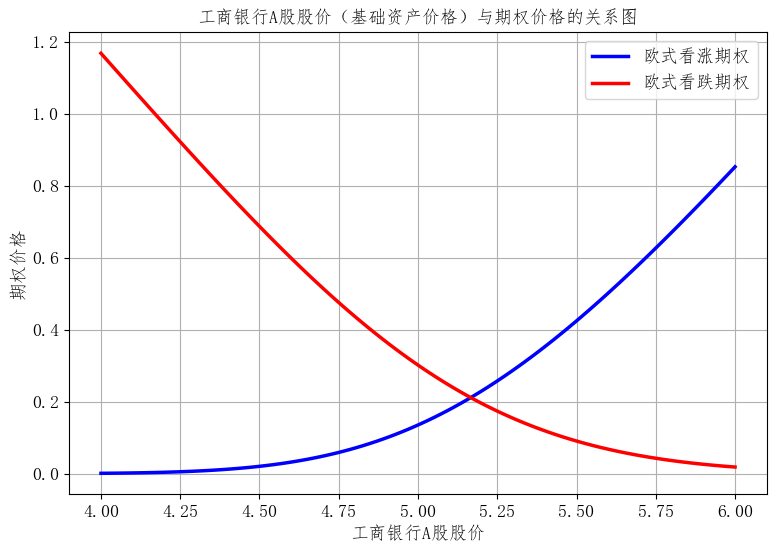

In [26]:
plt.figure(figsize=(9,6))
plt.plot(S_list,call_list1,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(S_list,put_list1,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'工商银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'工商银行A股股价（基础资产价格）与期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [27]:
K_list=np.linspace(4.2,6.2,100)

In [28]:
call_list2=option_BSM(S=S_ICBC,K=K_list,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')
put_list2=option_BSM(S=S_ICBC,K=K_list,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

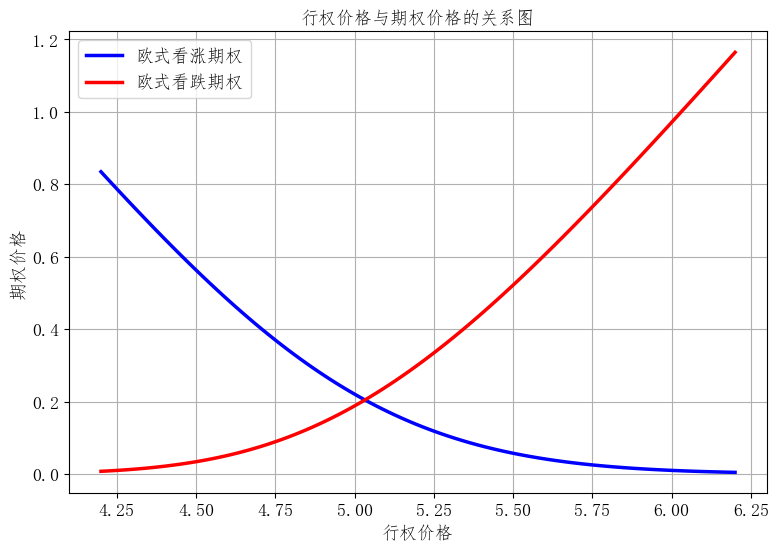

In [29]:
plt.figure(figsize=(9,6))
plt.plot(K_list,call_list2,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(K_list,put_list2,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'行权价格',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'行权价格与期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [30]:
sigma_list=np.linspace(0.01,0.3,100)

In [31]:
call_list3=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_list,r=shibor,T=tenor,opt='call')

In [32]:
put_list3=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_list,r=shibor,T=tenor,opt='put')

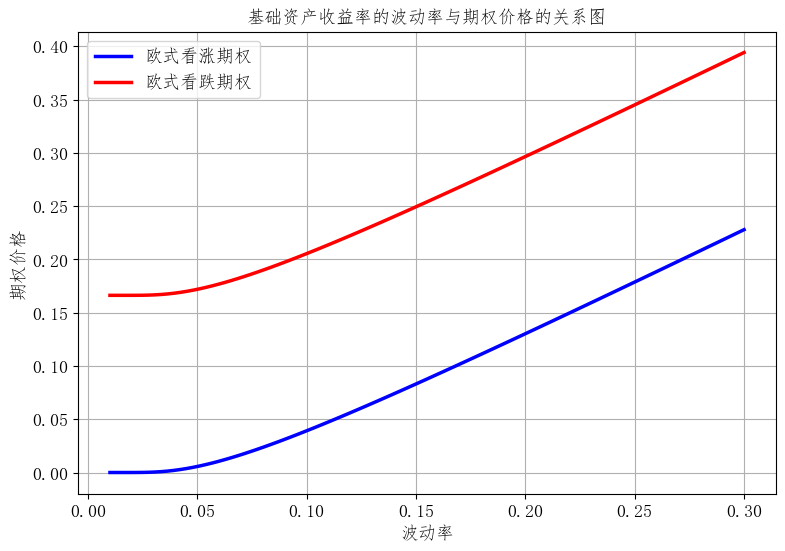

In [33]:
plt.figure(figsize=(9,6))
plt.plot(sigma_list,call_list3,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(sigma_list,put_list3,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'波动率',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'基础资产收益率的波动率与期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [34]:
shibor_list=np.linspace(0.01,0.1,100)

In [35]:
call_list4=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor_list,T=tenor,opt='call')
put_list4=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor_list,T=tenor,opt='put')

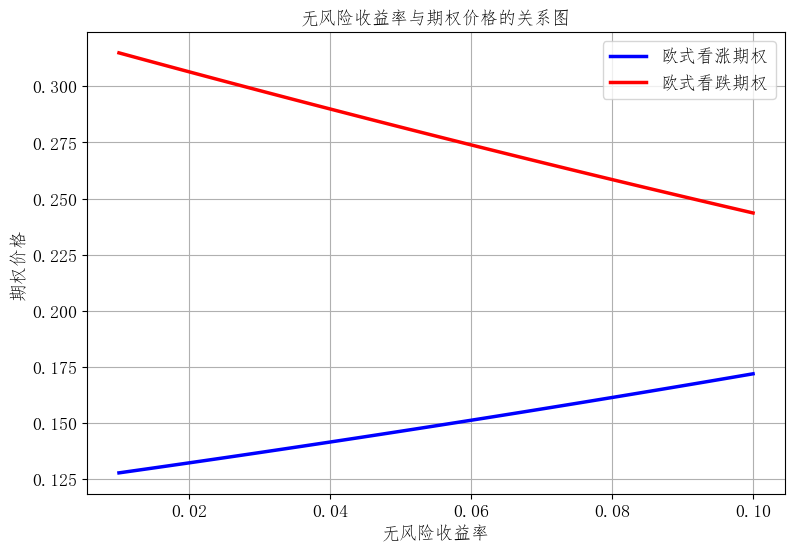

In [36]:
plt.figure(figsize=(9,6))
plt.plot(shibor_list,call_list4,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(shibor_list,put_list4,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'无风险收益率',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'无风险收益率与期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [37]:
tenor_list=np.linspace(0.1,3.0,100)

In [38]:
call_list5=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor_list,opt='call')
put_list5=option_BSM(S=S_ICBC,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor_list,opt='put')

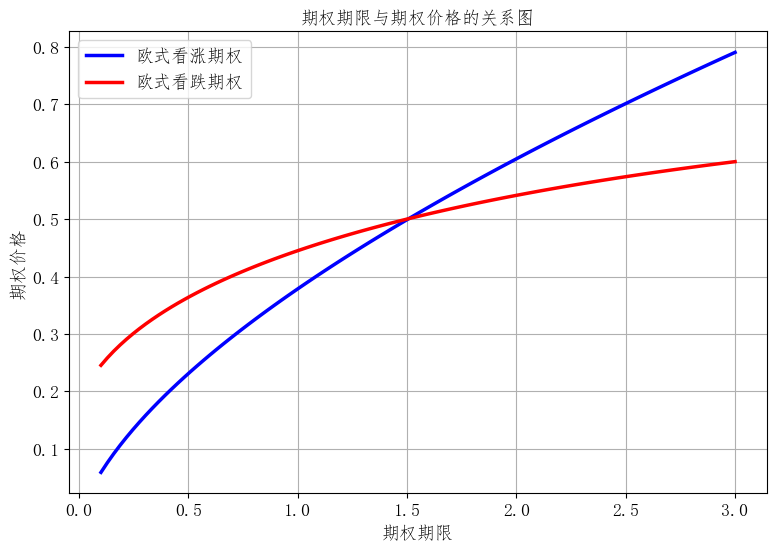

In [39]:
plt.figure(figsize=(9,6))
plt.plot(tenor_list,call_list5,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(tenor_list,put_list5,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [40]:
S_list=np.linspace(4.7,6,200)

In [41]:
price_call=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='call')

In [42]:
price_put=option_BSM(S=S_list,K=K_ICBC,sigma=sigma_ICBC,r=shibor,T=tenor,opt='put')

In [43]:
profit_call=np.maximum(S_list-K_ICBC,0) #计算看涨期权被行权所产生的收益（不考虑期权费）
profit_put=np.maximum(K_ICBC-S_list,0) #计算看跌期权被行权 所产生的收益（不考虑期权费）

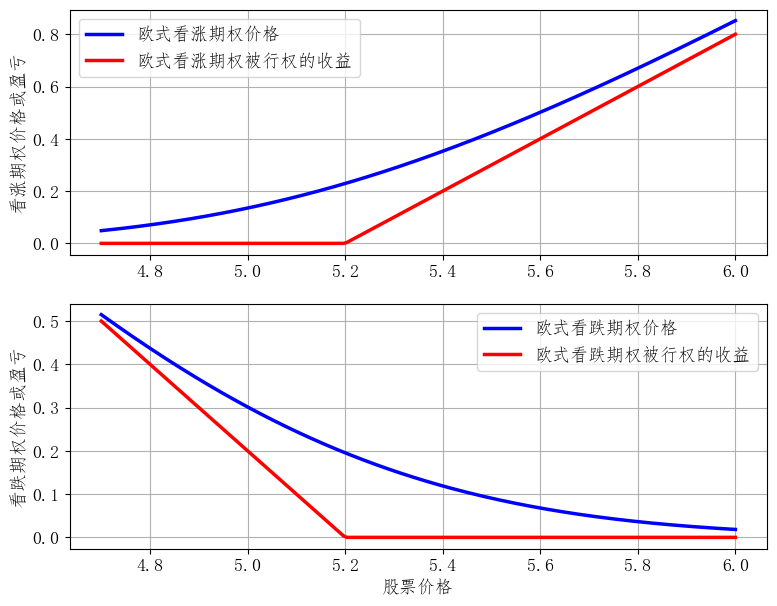

In [44]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.plot(S_list,price_call,'b-',label=u'欧式看涨期权价格',lw=2.5)
plt.plot(S_list,profit_call,'r-',label=u'欧式看涨期权被行权的收益',lw=2.5)
plt.xticks(fontsize=13)
plt.ylabel(u'看涨期权价格或盈亏',fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.subplot(2,1,2)
plt.plot(S_list,price_put,'b-',label=u'欧式看跌期权价格',lw=2.5)
plt.plot(S_list,profit_put,'r-',label=u'欧式看跌期权被行权的收益',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'看跌期权价格或盈亏',fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [45]:
def BTM_1step(S,K,u,d,r,T,types):
    '''定义一个运用一步二叉树模型计算欧式期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    u:代表基础资产价格上涨时价格变化比例
    d:代表基础资产价格下跌时价格变化比例
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    types:代表期权类型'''
    from numpy import exp,maximum
    p=(exp(r*T)-d)/(u-d) #基础资产价格上涨的概率
    Cu=maximum(S*u-K,0) #期权到期时基础资产价格上涨对应期权价值
    Cd=maximum(S*d-K,0) #期权到期时基础资产价格下跌对应期权价值
    call=(p*Cu+(1-p)*Cd)*exp(-r*T) #初始日的看涨期权价值
    put=call+K*exp(-r*T)-S #初始日的看跌期权价值（运用看跌-看涨平价关系式）
    if types=='call':
        value=call
    else:
        value=put
    return value

In [46]:
S_ICBC=6
K_ICBC=5.7
up=1.1
down=0.9
R=0.024 #无风险收益率
tenor=1.0 #期权期限（年）

In [47]:
value_call=BTM_1step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor,types='call')
print('2020年1月3日工商银行股票看涨期权价值',round(value_call,3))

2020年1月3日工商银行股票看涨期权价值 0.546


In [48]:
value_put=BTM_1step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor,types='put')
print('2020年1月3日工商银行股票看跌期权价值',round(value_put,3))

2020年1月3日工商银行股票看跌期权价值 0.111


In [49]:
def BTM_2step(S,K,u,d,r,T,types):
    '''定义一个运用两步二叉树模型计算欧式期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    u:代表基础资产价格上涨时价格变化比例
    d:代表基础资产价格下跌时价格变化比例
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    types:代表期权类型'''
    from numpy import exp,maximum
    t=T/2
    p=(exp(r*t)-d)/(u-d)
    Cuu=maximum(pow(u,2)*S-K,0)
    Cud=maximum(S*u*d-K,0)
    Cdd=maximum(pow(d,2)*S-K,0)
    call=(pow(p,2)*Cuu+2*p*(1-p)*Cud+pow(1-p,2)*Cdd)*np.exp(-r*T) #看涨期权价值
    put=call+K*exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

In [50]:
tenor_new=2
value_call_2Y=BTM_2step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor_new,types='call')
print('2020年1月3日工商银行股票看涨期权价值',round(value_call_2Y,4))

2020年1月3日工商银行股票看涨期权价值 0.6819


In [51]:
value_put_2Y=BTM_2step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor_new,types='put')
print('2020年1月3日工商银行股票看跌期权价值',round(value_put_2Y,4))

2020年1月3日工商银行股票看跌期权价值 0.1147


In [52]:
def BTM_Nstep(S,K,sigma,r,T,N,types):
    '''定义一个运用N步二叉树模型计算欧式期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数
    types:代表期权类型'''
    from math import factorial #导入math模块的阶乘函数
    from numpy import exp,maximum,sqrt
    t=T/N
    u=exp(sigma*sqrt(t))
    d=1/u
    p=(exp(r*t)-d)/(u-d)
    N_list=range(0,N+1)
    A=[] #设置一个空的列表
    for j in N_list:
        C_Nj=maximum(S*pow(u,j)*pow(d,N-j)-K,0) #计算期权到达日某节点的期权价格
        Num=factorial(N)/(factorial(j)*factorial(N-j)) #到达到期日该节点的实现路径数量
        A.append(Num*pow(p,j)*pow(1-p,N-j)*C_Nj) #在列表尾部每次增加一个元素
    call=exp(-r*T)*sum(A) #计算看涨期权的期初价值
    put=call+K*np.exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

In [53]:
P_ICBC=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第11章/工商银行A股日收盘价（2017-2019年）.xlsx',
                     sheet_name="Sheet1",header=0,index_col=0)

In [54]:
R_ICBC=np.log(P_ICBC/P_ICBC.shift(1))

In [55]:
Sigma_ICBC=np.sqrt(252)*np.std(R_ICBC) #计算工商银行股票年化波动率
Sigma_ICBC=float(Sigma_ICBC)
print('工商银行A股年化波动率',round(Sigma_ICBC,4))

工商银行A股年化波动率 0.2026


C:\Users\jay\AppData\Local\Temp\ipykernel_7148\3682712112.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Sigma_ICBC=float(Sigma_ICBC)


In [56]:
N_month=12
N_week=52
N_day=252

In [57]:
Call_value1=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_month,types='call')
Call_value2=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_week,types='call')
Call_value3=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_day,types='call')

In [58]:
print('运用12步二叉树模型（步长等于每月）计算2020年1月3日期权价值',round(Call_value1,4))
print('运用52步二叉树模型（步长等于每月）计算2020年1月3日期权价值',round(Call_value2,4))
print('运用252步二叉树模型（步长等于每月）计算2020年1月3日期权价值',round(Call_value3,4))

运用12步二叉树模型（步长等于每月）计算2020年1月3日期权价值 0.7245
运用52步二叉树模型（步长等于每月）计算2020年1月3日期权价值 0.7152
运用252步二叉树模型（步长等于每月）计算2020年1月3日期权价值 0.7156


In [59]:
Price_CCB=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第11章/建设银行A股收盘价（2018年至2020年8月18日）.xlsx',
                       sheet_name="Sheet1",header=0,index_col=0)

In [60]:
R_CCB=np.log(Price_CCB/Price_CCB.shift(1))

In [61]:
Sigma_CCB=np.sqrt(252)*np.std(R_CCB)
Sigma_CCB=float(Sigma_CCB)
print('建设银行A股年化波动率',round(Sigma_CCB,4))

建设银行A股年化波动率 0.2538


C:\Users\jay\AppData\Local\Temp\ipykernel_7148\3712085712.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Sigma_CCB=float(Sigma_CCB)


In [62]:
S_CCB=6.32
T_CCB=1
R_Aug18=0.0228
K_CCB=6.6

In [63]:
value_BSM=option_BSM(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,opt='call')

In [64]:
print('运用BSM模型计算得到建设银行股票看涨期权价值',round(value_BSM,4))

运用BSM模型计算得到建设银行股票看涨期权价值 0.5813


In [65]:
N1=10
N2=50
N3=250

In [66]:
value_BTM_N1=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N1,types='call') #运用10步二叉树模型对期权定价

In [67]:
value_BTM_N2=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N2,types='call') #运用50步二叉树模型对期权定价
value_BTM_N3=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N3,types='call') #运用250步二叉树模型对期权定价

In [68]:
print('运用10步二叉树模型计算得出建设银行股票看涨期权价值',round(value_BTM_N1,4))
print('运用50步二叉树模型计算得出建设银行股票看涨期权价值',round(value_BTM_N2,4))
print('运用250步二叉树模型计算得出建设银行股票看涨期权价值',round(value_BTM_N3,4))

运用10步二叉树模型计算得出建设银行股票看涨期权价值 0.5899
运用50步二叉树模型计算得出建设银行股票看涨期权价值 0.5841
运用250步二叉树模型计算得出建设银行股票看涨期权价值 0.5818


In [69]:
N_list=range(1,151) #创建1到150的整数列表作为步数

In [70]:
N_list

range(1, 151)

In [71]:
value_BTM_list=np.zeros(len(N_list)) #创建存放期权价值的初始数组

In [72]:
value_BTM_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
for i in N_list:
    value_BTM_list[i-1]=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=i,types='call')

In [74]:
value_BSM_list=value_BSM*np.ones(len(N_list)) #创建运用BSM模型计算得到期权价值的数组

In [75]:
value_BSM_list

array([0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129228,
       0.58129228, 0.58129228, 0.58129228, 0.58129228, 0.58129

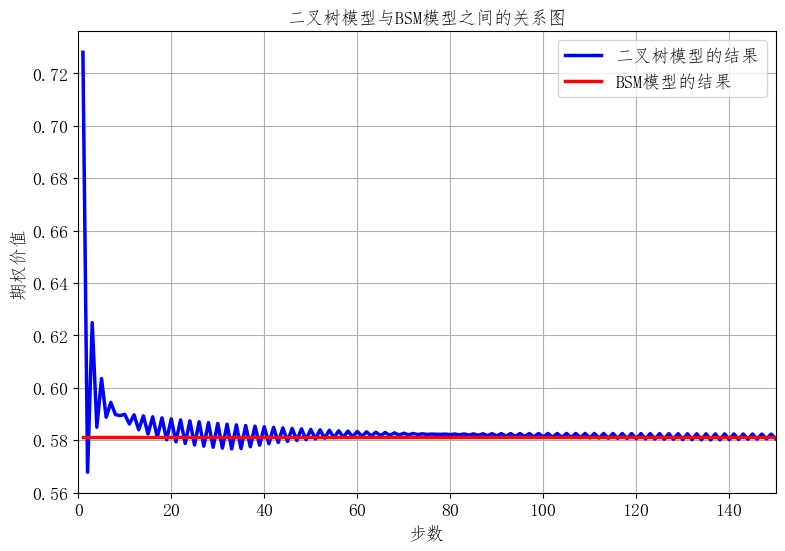

In [76]:
plt.figure(figsize=(9,6))
plt.plot(N_list,value_BTM_list,'b-',label=u'二叉树模型的结果',lw=2.5)
plt.plot(N_list,value_BSM_list,'r-',label=u'BSM模型的结果',lw=2.5)
plt.xlabel(u'步数',fontsize=13)
plt.xticks(fontsize=13)
plt.xlim(0,150) #设置x轴的刻度为0-150
plt.ylabel(u'期权价值',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'二叉树模型与BSM模型之间的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [99]:
def American_call(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看涨期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    #第一步是计算相关参数
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d) #计算基础资产价格上涨的概率
    call_matrix=np.zeros((N+1,N+1)) #创建N+1行，N+1列的零矩阵，用于后续存放每个节点的期权价值
    #第二步是计算期权到期日节点的基础资产价格与期权价值
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list) #计算期权到期时节点的基础资产价格，按照节点从上往下排序
    call_matrix[:,-1]=np.maximum(S_end-K,0) #计算期权到期时节点的看涨期权价值（按照节点从上往下排序）
    #第三步是计算期权非到期日节点的基础资产价格与期权价值
    i_list=list(range(0,N)) #创建从0到N-1的自然数数列（列表格式）
    i_list.reverse() #将列表的元素由大到小重新排序（从N-1到0）
    for i in i_list:
        j_list=np.arange(i+1) #创建从0到i的自然数数列（数组格式）
        Si=S*pow(u,i-j_list)*pow(d,j_list) #计算在i△t时刻各节点上的基础资产价格（按照节点从上往下排序）
        call_strike=np.maximum(Si-K,0) #计算提前行权时的期权收益
        call_nostrike=(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])*np.exp(-r*t) #计算不提前行权时的期权价值
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    call_begin=call_matrix[0,0] #期权初始价值
    return call_begin

In [100]:
def American_put(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看跌期权价值的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    #第一步是计算相关参数
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d) #计算基础资产价格上涨的概率
    put_matrix=np.zeros((N+1,N+1)) #创建N+1行，N+1列的零矩阵，用于后续存放每个节点的期权价值
    #第二步是计算期权到期日节点的基础资产价格与期权价值
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list) #计算期权到期时节点的基础资产价格，按照节点从上往下排序
    put_matrix[:,-1]=np.maximum(K-S_end,0) #计算期权到期时节点的看跌期权价值（按照节点从上往下排序）
    #第三步是计算期权非到期日节点的基础资产价格与期权价值
    i_list=list(range(0,N)) #创建从0到N-1的自然数数列（列表格式）
    i_list.reverse() #将列表的元素由大到小重新排序（从N-1到0）
    for i in i_list:
        j_list=np.arange(i+1) #创建从0到i的自然数数列（数组格式）
        Si=S*pow(u,i-j_list)*pow(d,j_list) #计算在i△t时刻各节点上的基础资产价格（按照节点从上往下排序）
        put_strike=np.maximum(K-Si,0) #计算提前行权时的期权收益
        put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1]) #计算不提前行权时的期权价值
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    put_begin=put_matrix[0,0] #期权初始价值
    return put_begin

In [101]:
Price_BOC=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第11章/中国银行A股日收盘价数据（2017年至2020年2月7日）.xlsx',
                       sheet_name="Sheet1",header=0,index_col=0)

In [102]:
R_BOC=np.log(Price_BOC/Price_BOC.shift(1))

In [103]:
Sigma_BOC=np.sqrt(252)*np.std(R_BOC)
Sigma_BOC=float(Sigma_BOC)
print('中国银行A股年化波动率',round(Sigma_BOC,4))

中国银行A股年化波动率 0.1676


C:\Users\jay\AppData\Local\Temp\ipykernel_7148\1411377315.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Sigma_BOC=float(Sigma_BOC)


In [104]:
S_BOC=3.5
K_BOC=3.8
T_BOC=1
r_Feb10=0.02
N_2=2

In [105]:
Put_2step=American_put(S=S_BOC,K=K_BOC,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_2) #运用两步二叉树模型
print('运用两步二叉树模型计算中国银行A股美式看跌期权价值',round(Put_2step,4))

运用两步二叉树模型计算中国银行A股美式看跌期权价值 0.4069


In [106]:
N_12=12
N_52=52
N_252=252

In [107]:
Put_12step=American_put(S=S_BOC,K=K_BOC,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_12) 
Put_52step=American_put(S=S_BOC,K=K_BOC,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_52) 
Put_252step=American_put(S=S_BOC,K=K_BOC,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252) 
print('运用两步二叉树模型计算中国银行A股美式看跌期权价值',round(Put_12step,4))
print('运用两步二叉树模型计算中国银行A股美式看跌期权价值',round(Put_52step,4))
print('运用两步二叉树模型计算中国银行A股美式看跌期权价值',round(Put_252step,4))

运用两步二叉树模型计算中国银行A股美式看跌期权价值 0.3847
运用两步二叉树模型计算中国银行A股美式看跌期权价值 0.3853
运用两步二叉树模型计算中国银行A股美式看跌期权价值 0.3849


In [108]:
K1=3.0
K2=3.5
K3=4.0

In [109]:
Euro_call_K1=BTM_Nstep(S=S_BOC,K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='call')
Amer_call_K1=American_call(S=S_BOC,K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)
Euro_call_K2=BTM_Nstep(S=S_BOC,K=K2,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='call')
Amer_call_K2=American_call(S=S_BOC,K=K2,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)
Euro_call_K3=BTM_Nstep(S=S_BOC,K=K3,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='call')
Amer_call_K3=American_call(S=S_BOC,K=K3,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)

In [110]:
print('行权价格为3元的欧式看涨期权价值',Euro_call_K1)
print('行权价格为3元的美式看涨期权价值',Amer_call_K1)
print('行权价格为3.5元的欧式看涨期权价值',Euro_call_K2)
print('行权价格为3.5元的美式看涨期权价值',Amer_call_K2)
print('行权价格为4元的欧式看涨期权价值',Euro_call_K3)
print('行权价格为4元的美式看涨期权价值',Amer_call_K3)

行权价格为3元的欧式看涨期权价值 0.6009336736887524
行权价格为3元的美式看涨期权价值 0.6009336736887604
行权价格为3.5元的欧式看涨期权价值 0.26751274557721655
行权价格为3.5元的美式看涨期权价值 0.26751274557722005
行权价格为4元的欧式看涨期权价值 0.09207459670132756
行权价格为4元的美式看涨期权价值 0.09207459670132873


In [111]:
Euro_put_K1=BTM_Nstep(S=S_BOC,K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='put')
Amer_put_K1=American_put(S=S_BOC,K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)
Euro_put_K2=BTM_Nstep(S=S_BOC,K=K2,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='put')
Amer_put_K2=American_put(S=S_BOC,K=K2,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)
Euro_put_K3=BTM_Nstep(S=S_BOC,K=K3,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='put')
Amer_put_K3=American_put(S=S_BOC,K=K3,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)

In [112]:
print('行权价格为3元的欧式看跌期权价值',Euro_put_K1)
print('行权价格为3元的美式看跌期权价值',Amer_put_K1)
print('行权价格为3.5元的欧式看跌期权价值',Euro_put_K2)
print('行权价格为3.5元的美式看跌期权价值',Amer_put_K2)
print('行权价格为4元的欧式看跌期权价值',Euro_put_K3)
print('行权价格为4元的美式看跌期权价值',Amer_put_K3)

行权价格为3元的欧式看跌期权价值 0.041529693609017926
行权价格为3元的美式看跌期权价值 0.042376999395400884
行权价格为3.5元的欧式看跌期权价值 0.19820810215085993
行权价格为3.5元的美式看跌期权价值 0.2045321168794166
行权价格为4元的欧式看跌期权价值 0.5128692899283482
行权价格为4元的美式看跌期权价值 0.5371245309809153


In [113]:
S_BOC_list=np.linspace(1.0,5.0,200)

In [114]:
Euro_put_list=np.zeros_like(S_BOC_list)
Amer_put_list=np.zeros_like(S_BOC_list)

In [115]:
for i in range(len(S_BOC_list)):
    Euro_put_list[i]=BTM_Nstep(S=S_BOC_list[i],K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252,types='put')
    Amer_put_list[i]=American_put(S=S_BOC_list[i],K=K1,sigma=Sigma_BOC,r=r_Feb10,T=T_BOC,N=N_252)

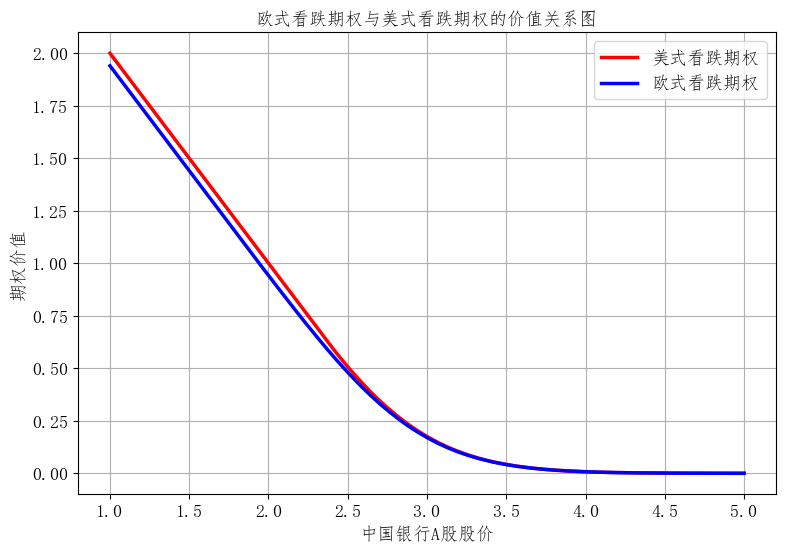

In [116]:
plt.figure(figsize=(9,6))
plt.plot(S_BOC_list,Amer_put_list,'r-',label=u'美式看跌期权',lw=2.5)
plt.plot(S_BOC_list,Euro_put_list,'b-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'中国银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价值',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'欧式看跌期权与美式看跌期权的价值关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [117]:
Intrinsic_value=np.maximum(K1-S_BOC_list,0) #看跌期权内在价值

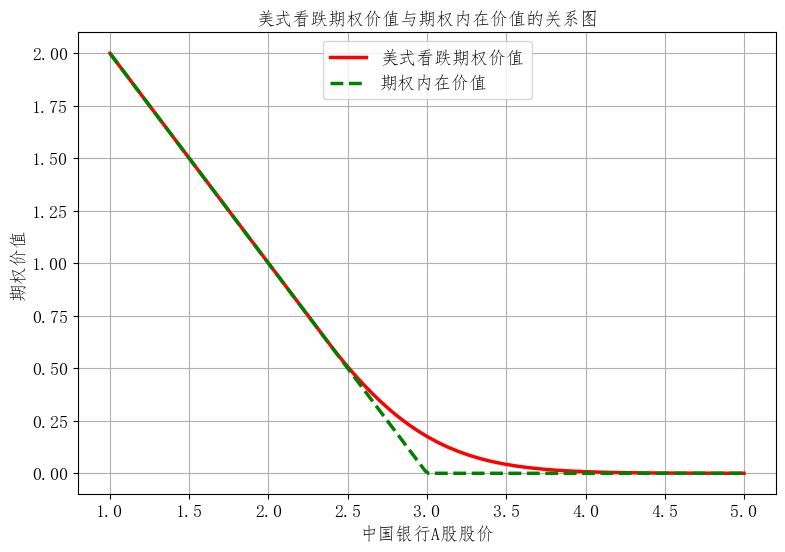

In [118]:
plt.figure(figsize=(9,6))
plt.plot(S_BOC_list,Amer_put_list,'r-',label=u'美式看跌期权价值',lw=2.5)
plt.plot(S_BOC_list,Intrinsic_value,'g--',label=u'期权内在价值',lw=2.5)
plt.xlabel(u'中国银行A股股价',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'期权价值',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'美式看跌期权价值与期权内在价值的关系图',fontsize=13)
plt.legend(fontsize=13,loc=9)
plt.grid()
plt.show()

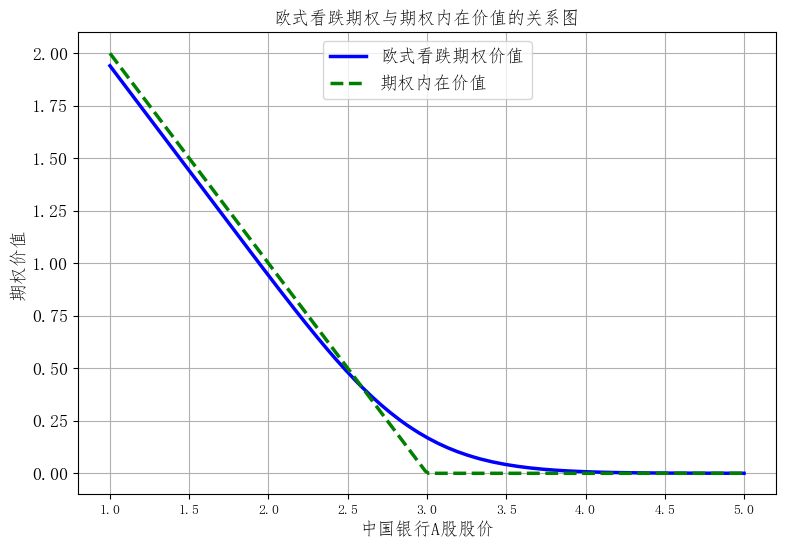

In [121]:
plt.figure(figsize=(9,6))
plt.plot(S_BOC_list,Euro_put_list,'b-',label=u'欧式看跌期权价值',lw=2.5)
plt.plot(S_BOC_list,Intrinsic_value,'g--',label=u'期权内在价值',lw=2.5)
plt.xlabel(u'中国银行A股股价',fontsize=13)
plt.ylabel(u'期权价值',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'欧式看跌期权与期权内在价值的关系图',fontsize=13)
plt.legend(fontsize=13,loc=9)
plt.grid()
plt.show()